# <center> Introdução a modelagem de Séries Temporais

<center> <img src='https://i.pinimg.com/originals/57/2f/8c/572f8cbe4c9f69c217bdc33b82eb0c28.gif' width=1000>

### Neste notebook, iremos avaliar as principais bibliotecas de análise de séries temporais, bem como nos aprofundarmos nos modelos preditivos!

## 1. Carregamento dos dados, EDA e análises rápidas

Aqui iremos focar em ferramentas de visualização e também aprenderemos como plotar os gráficos de correlação úteis para análise!

Vamos iniciar carregando os dados e as bibliotecas necessárias para a nossa análise

In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados
# Removendo warnings chatos
import warnings
warnings.filterwarnings('ignore')
# Carregando as principais bibliotecas com o 'import'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999 

# Carregando nosso primeiro dataset, que calculou a diferença entre as vendas de dois dias consecutivos
data = pd.read_csv('catfish.csv')
data['saldo_vendas'] = data.Total.diff() # Calculando a diferença entre o dia anterior e o atual
data = data[['Date','saldo_vendas']].dropna()

# Filtrando um período menor
data = data[data.Date>='2000-1-01']
data = data[data.Date<='2004-1-01']

In [2]:
data.head()

,Date,saldo_vendas
168,2000-1-01,3040.0
169,2000-2-01,-58.0
170,2000-3-01,3807.0
171,2000-4-01,-4237.0
172,2000-5-01,-161.0


Podemos fazer mais algumas checagens adicionais do dataset com comandos que já conhecemos, como o `.describe()` e o `.info()`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 168 to 216
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          49 non-null     object 
 1   saldo_vendas  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data.describe()

,saldo_vendas
count,49.000000
mean,97.306122
std,2507.323533
min,-4459.000000
25%,-1463.000000
50%,2.000000
75%,1461.000000
max,5538.000000


Infelizmente nosso campo de `data` está marcado como `object`! Podemos convertê-lo para um formato mais amigável?

Podemos fazer isso usando o formato `Datetime`, específico para lidar com datas e horários! Podemos usar o comando `pd.to_datetime()` para fazer essa conversão

In [5]:
# Convertendo o campo `Date` para datetime
data['Date'] = pd.to_datetime(data['Date'])
# Checando o resutado
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 168 to 216
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          49 non-null     datetime64[ns]
 1   saldo_vendas  49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


Podemos agora usar o `.describe()` e conseguimos ver as estatísticas sobre ela!

In [6]:
print('Maior data: {}'.format(data.Date.max())) # Máximo
print('Menor data: {}'.format(data.Date.min())) # Mínimo

Maior data: 2004-01-01 00:00:00
Menor data: 2000-01-01 00:00:00


### Gráficos com variáveis temporais e análise de estacionariedade

Podemos agora construir o gráfico que representa nossa série temporal, usando o `.plot`

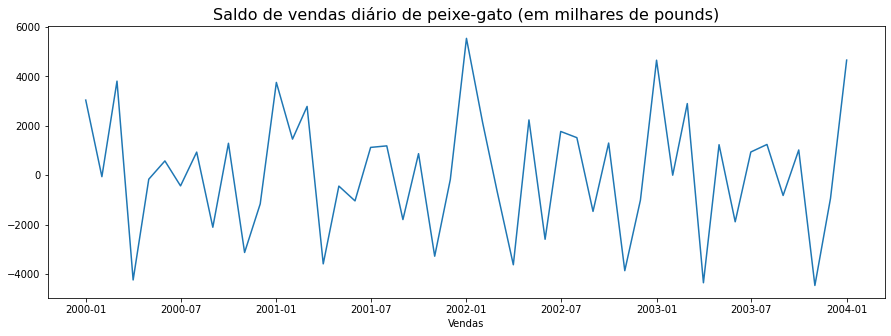

In [7]:
plt.figure(figsize=(15,5))
plt.plot(data.Date,data.saldo_vendas)
plt.xlabel('Dia')
plt.xlabel('Vendas')
plt.title('Saldo de vendas diário de peixe-gato (em milhares de pounds)',size=16)
plt.show()

Essa série temporal é `estacionária`? Como podemos confirmar localmente?

Como vimos anteriormente, a estacionariedade de uma série pode ser confirmada se possuir duas ter três características:
* Sua média ser constante no tempo
* Seu desvio padrão for constante no tempo
* Não houver nenhuma **sazonalidade** nos dados

Podemos calcular a média e o desvio padrão globais, mas como checar de fato se não há dependência temporal?

In [8]:
print("Média: {:.2f}".format(data.saldo_vendas.mean()))
print("Desvio padrão: {:.2f}".format(data.saldo_vendas.std()))

Média: 97.31
Desvio padrão: 2507.32


### Resample e o campo datetime

Se incluirmos o campo de formato `datetime` como `índice` do nosso Dataset, passaremos a ter várias análises disponíveis

In [9]:
# Copiando o dataset para facilitar o acompanhamento
data_resample = data.copy()

# Incluindo o campo Date como índice
data_resample.set_index('Date',inplace=True) # Inplace para fazer a operação permanente no Dataset

# Checando o dataset final
data_resample.head()

,saldo_vendas
Date,
2000-01-01,3040.0
2000-02-01,-58.0
2000-03-01,3807.0
2000-04-01,-4237.0
2000-05-01,-161.0


Quando temos um dataset com o **índice** sendo do tipo `datetime`, podemos começar a agrupar os dados por diferentes **intervalos de tempo**.

Para isso, usamos o método `resample`

In [10]:
# Reagrupando por mês
data_resample = data_resample.resample('2M') # Reagrupando pelo bimestre, 'M' indica 'Month', porém temos mais quebras possíveis!
data_resample

Para termos o dataset novamente, precisamos atrelar a essa operação alguma função de `agregação` dos dados, como a `média`, por exemplo:

In [11]:
# Extraindo a média
data_resample.mean()

,saldo_vendas
Date,
2000-01-31,3040.0
2000-03-31,1874.5
2000-05-31,-2199.0
2000-07-31,74.0
2000-09-30,-584.0
2000-11-30,-916.0
2001-01-31,1298.0
2001-03-31,2122.5
2001-05-31,-2012.0


Com o agrupamento dessa forma, o que podemos avaliar sobre a média?

In [12]:
# Desvio padrão
data_resample.std()

,saldo_vendas
Date,
2000-01-31,NaN
2000-03-31,2732.967709
2000-05-31,2882.167240
2000-07-31,714.177849
2000-09-30,2149.604615
2000-11-30,3123.997759
2001-01-31,3474.722723
2001-03-31,935.502272
2001-05-31,2224.557934


Com o agrupamento dessa forma, o que podemos avaliar sobre o desvio padrão?

Podemos agregar as duas operações simultaneamente usando o `.agg()`

In [13]:
data_resample.agg(['mean','std'])

saldo_vendas             
                   mean          std
Date                                
2000-01-31       3040.0          NaN
2000-03-31       1874.5  2732.967709
2000-05-31      -2199.0  2882.167240
2000-07-31         74.0   714.177849
2000-09-30       -584.0  2149.604615
2000-11-30       -916.0  3123.997759
2001-01-31       1298.0  3474.722723
2001-03-31       2122.5   935.502272
2001-05-31      -2012.0  2224.557934
2001-07-31         44.0  1530.179074
2001-09-30       -303.0  2108.592421
2001-11-30      -1201.5  2933.786035
2002-01-31       2683.0  4037.579721
2002-03-31        736.0  1978.484774
2002-05-31       -692.0  4143.645738
2002-07-31       -410.0  3084.399780
2002-09-30         28.5  2109.299528
2002-11-30      -1279.5  3650.792311
2003-01-31       1822.5  4004.345702
2003-03-31       1450.5  2048.488345
2003-05-31      -1557.5  3949.191373
2003-07-31       -471.5  1996.162443
2003-09-30        213.0  1459.468396
2003-11-30      -1718.5  3875.652268
2004-01-31       1862.0  3954.141120

Podemos inclusive calcular outras agragações, como por `trimestre`, `semestre` e `quinzena`

In [14]:
# Agregando por trimestre
data.set_index('Date').resample('5M').agg(['mean','std'])

saldo_vendas             
                   mean          std
Date                                
2000-01-31       3040.0          NaN
2000-06-30        -14.0  2863.955481
2000-11-30       -686.2  1908.651016
2001-04-30        651.2  3002.515645
2001-09-30       -191.4  1321.424534
2002-02-28       1019.6  3223.105537
2002-07-31       -573.4  2587.125876
2002-12-31       -702.2  2213.930374
2003-05-31        888.0  3412.071438
2003-10-31        101.0  1382.348907
2004-03-31       -245.0  4597.386540

In [15]:
# Agregando por semestre
data.set_index('Date').resample('6M').agg(['mean','std'])

saldo_vendas             
                   mean          std
Date                                
2000-01-31  3040.000000          NaN
2000-07-31   -83.500000  2567.250338
2001-01-31   -67.333333  2536.000368
2001-07-31    51.500000  2247.644523
2002-01-31   392.833333  3029.759226
2002-07-31  -122.000000  2564.595095
2003-01-31   190.500000  2950.028796
2003-07-31  -192.833333  2571.307482
2004-01-31   118.833333  3021.011183

Por fim, podemos plotar todos os gráficos e avaliar suas diferenças!

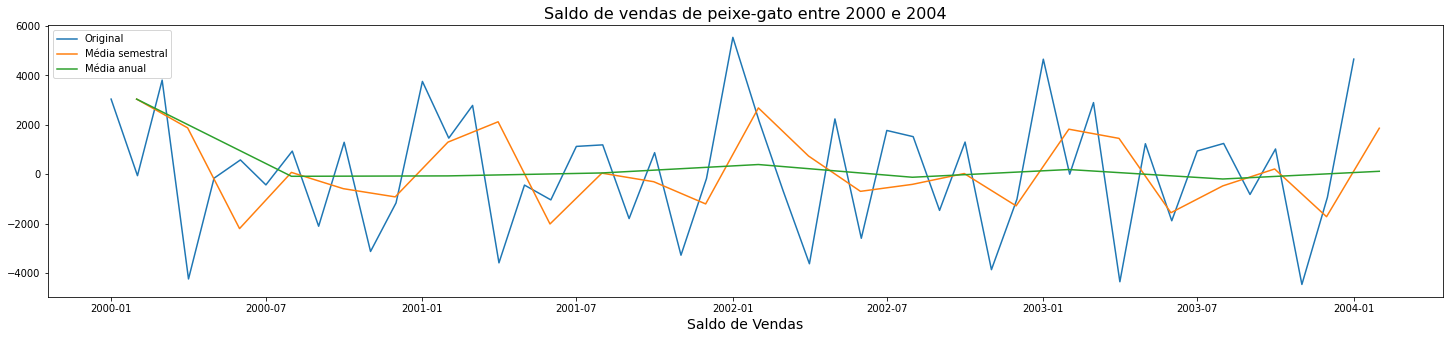

In [16]:
plt.figure(figsize=(25,5))
plt.plot(data.Date,data.saldo_vendas) # Série original
# Série mensal
data_mensal = data.set_index('Date').resample('2M').mean()
plt.plot(data_mensal) # Série mensal
# Série semanal
data_quinzenal = data.set_index('Date').resample('6M').mean()
plt.plot(data_quinzenal) # Série semanal
# Acertando detalhes do gráfico
plt.xlabel('Dia',size=14)
plt.xlabel('Saldo de Vendas',size=14)
plt.title('Saldo de vendas de peixe-gato entre 2000 e 2004',size=16)
plt.legend(['Original','Média semestral','Média anual'])
plt.show()

## 2. Ferramentas de análise de séries temporais

A análise de estacionariedade é bem subjetiva! Quais ferramentas poderiam nos ajudar a identificar estacionariedade e outras propriedades?

### Teste de estacionariedade de Dickey-Fuller

Poderíamos fazer uma análise visual ou até mesmo construir agregações para identificar estacionariedade, mas o mais indicado aqui é um **teste confiável** e rápido de ser feito!

Para isso, usaremos o `Teste de Dickey Fuller`

In [17]:
# Importando módulos de teste
from statsmodels.tsa.stattools import adfuller

Este é um **teste de hipótese** que determina as seguintes hipóteses:
* **Hipótese nula (H0):** A série _não é_ estacionária
* **Hipótese nula (H1):** A série _é_ estacionária

A série poderá ser considerada estacionária se o `p-valor` do teste for menor do que a significância que determinarmos; normalmente usamos `5%`

In [18]:
# Instanciando o teste (o p-valor é sempre o SEGUNDO número da tupla)
teste_fuller_estac = adfuller(data.saldo_vendas)
print("O p-valor do teste foi de {:.2f}".format(teste_fuller_estac[1]))

O p-valor do teste foi de 0.04


O `segundo elemento` do resultado é a nossa significância, neste caso **menor do que 5%**; sendo assim, podemos considerar a série como estacionária!

Vamos realizar rapidamente o teste sobre outra série não estacionária:

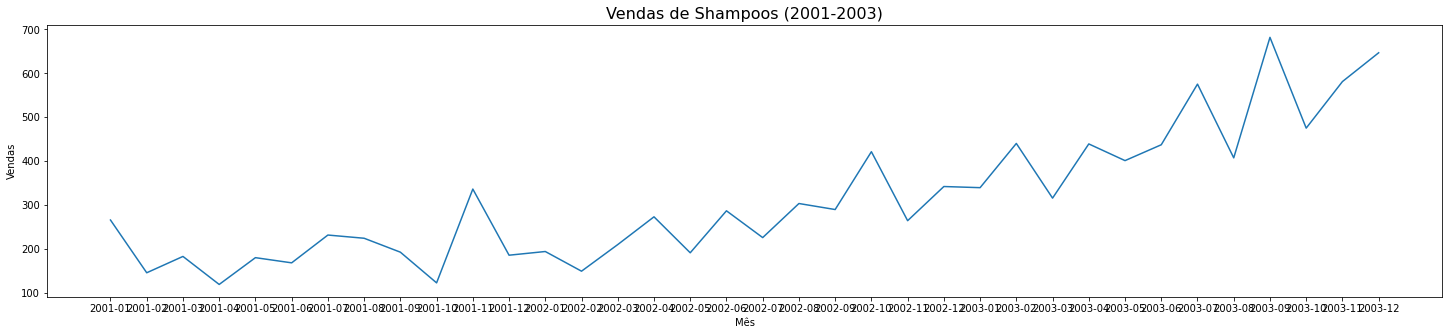

In [19]:
# Carregando dados de série não estacionária
data_nao_estac = pd.read_csv('exemplo_nao_estac.csv',sep=';')
data_nao_estac.columns = ['Mes','Vendas']

# Checando dados
data_nao_estac.head()

# Gráfico dos dados
plt.figure(figsize=(25,5))
plt.plot(data_nao_estac.set_index('Mes'))
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas de Shampoos (2001-2003)',size=16)
plt.show()

In [20]:
# Teste de estacionariedade
teste_fuller_naoestac = adfuller(data_nao_estac.Vendas) # Colocar apenas a coluna referente aos dados!
print("O p-valor do teste foi de {:.2f}".format(teste_fuller_naoestac[1]))

O p-valor do teste foi de 1.00


Dessa vez tivemos uma significância de 100%, superando muito em 5% nossa tolerância! Dessa forma, concluímos que a série não é estacionária

### Analisando autocorrelações

Como já vimos, um recurso muito útil para analisar o comportamento das séries temporais é a análise das autocorrelações! Vamos usar os módulos do `statsmodels` para isso

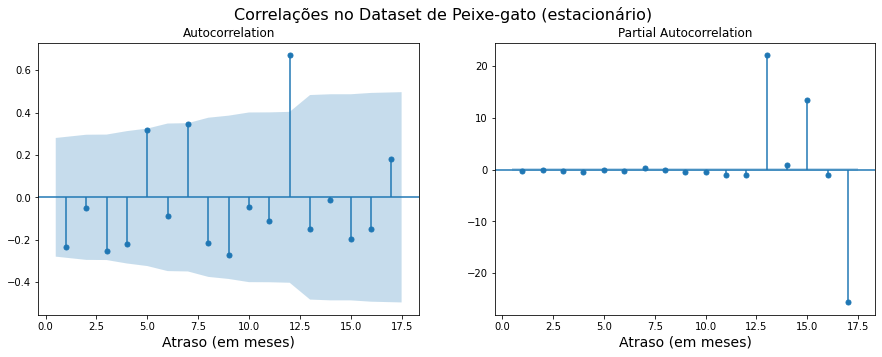

In [21]:
# Importando ACF e PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Construindo os gráficos
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
plot_acf(data.saldo_vendas,ax=ax[0],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[0].set_xlabel('Atraso (em meses)',size=14)
plot_pacf(data.saldo_vendas,ax=ax[1],zero=False) # A correlação(0) sempre será 1, então não vamos plotá-la
ax[1].set_xlabel('Atraso (em meses)',size=14)
plt.suptitle("Correlações no Dataset de Peixe-gato (estacionário)",size=16)
plt.show()

Que conclusões podemos tirar dos gráficos?

Realizando o mesmo procedimento agora para o dataset de `shampoos`, que não é estacionário

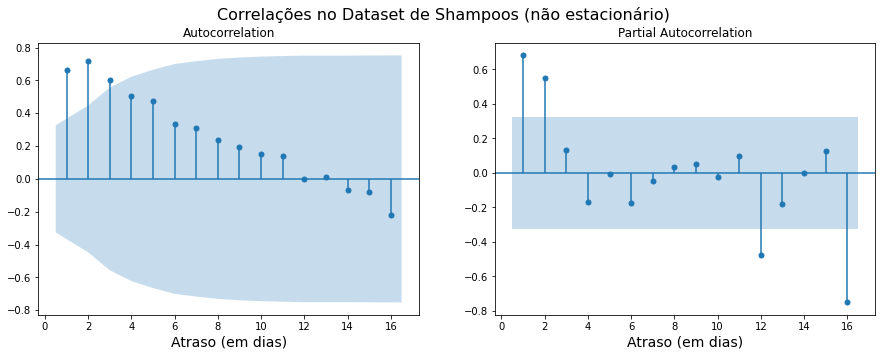

In [22]:
# Construindo os gráficos
fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
plot_acf(data_nao_estac.Vendas,ax=ax[0],zero=False) # Precisamos indicar apenas a coluna com a série temporal em sí
ax[0].set_xlabel('Atraso (em dias)',size=14)
plot_pacf(data_nao_estac.Vendas,ax=ax[1],zero=False) # Precisamos indicar apenas a coluna com a série temporal em sí
ax[1].set_xlabel('Atraso (em dias)',size=14)
plt.suptitle("Correlações no Dataset de Shampoos (não estacionário)",size=16)
plt.show()

Quais são as principais diferenças?

Já que vamos construir mais gráficos de correlações, vamos colocar esse processo em uma `função`:

In [23]:
def plota_correlacoes(dataset, nome_dataset, unidade):
    fig, ax = plt.subplots(1,2,figsize=(15,5)) # Para facilitar, vamos fazer um grid de dois gráficos, na horizontal
    plot_acf(dataset,ax=ax[0],zero=False) # Sem a ACF(0)
    ax[0].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plot_pacf(dataset,ax=ax[1],zero=False) # Sem a PACF(0)
    ax[1].set_xlabel('Atraso (em {})'.format(unidade),size=14)
    plt.suptitle("Correlações no Dataset de {}".format(nome_dataset,size=16))
    plt.show()
    return None # Não precisamos retornar nada

E como é a correlação de uma `série aleatória`?

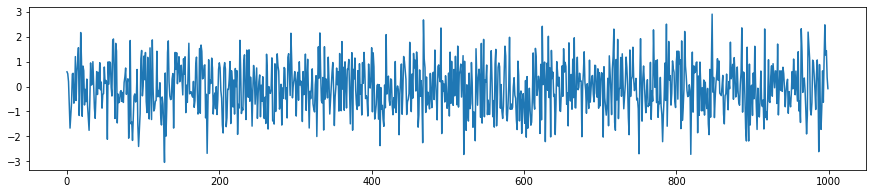

In [24]:
# Construindo uma série aleatória
from random import gauss # importando módulo que constrói uma distribuição Gaussiana

aleatorio = pd.Series([gauss(0.0, 1.0) for i in range(1000)]) # Construindo a série

# Plotando a série
plt.figure(figsize=(15,3))
plt.plot(aleatorio)
plt.show()

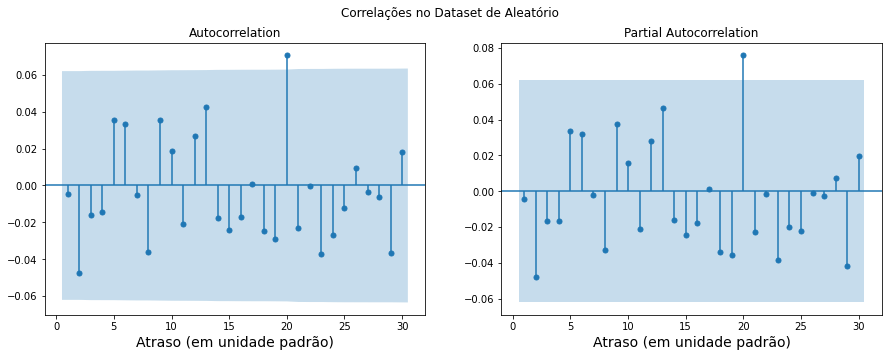

In [25]:
# Plotando as autocorrelações
plota_correlacoes(aleatorio,'Aleatório','unidade padrão')

O que há de particular nessa série temporal?

## 3. Modelando nossa série temporal

Agora que temos uma ideia de análise das séries, vamos tentar construir modelos preditivos que usem a própria série como parâmetros!

### Separando em treino e teste

Assim como em qualquer situação de modelagem, é importante separar nossos dados para que possamos ver como nosso modelo performa em dados nunca vistos. Como `não podemos usar o futuro para prever o passado`, vamos fazer um **corte temporal** e não aleatório para separar treino e teste

In [26]:
# Relembrando o dataset utilizado, de nascimentos
df = data.copy()
df.head()

,Date,saldo_vendas
168,2000-01-01,3040.0
169,2000-02-01,-58.0
170,2000-03-01,3807.0
171,2000-04-01,-4237.0
172,2000-05-01,-161.0


In [27]:
# Relembrando valores mínimo e máximo
print(df.Date.min())
print(df.Date.max())

2000-01-01 00:00:00
2004-01-01 00:00:00


Vamos então separar `a partir de Jul/2003` como teste

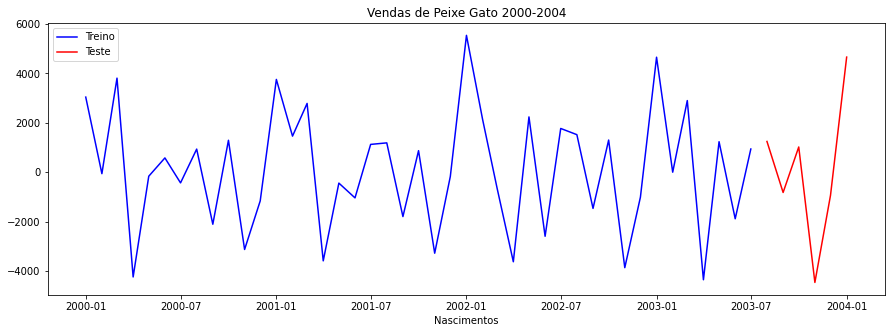

In [28]:
# Data de corte
dt_corte = '2003-07-01'

# Separando em treino e teste, pela data e colocando a data como índice
df_train = df[df.Date<=dt_corte].set_index('Date')
df_test = df[df.Date>dt_corte].set_index('Date')

# Plotando treino e teste
plt.figure(figsize=(15,5))
plt.plot(df_train,color='b') # Plotando treino
plt.plot(df_test,color='r') # Plotando teste
plt.legend(['Treino','Teste'])
plt.xlabel('Data')
plt.xlabel('Nascimentos')
plt.title('Vendas de Peixe Gato 2000-2004')
plt.show()

Como a série é estacionária, estamos garantindo que os datasets de treino e teste possuem as mesmas características. Em quais cenários essa divisão poderia gerar um **problema**?

### Ajustando uma Autocorrelação (AR)

O modelo `AR` permite que usemos os valores anteriores da série como `features` da nossa regressão! Vamos agora treinar uma Autocorrelação simples, usando apénas **o primeiro atraso** como feature

In [29]:
# O modelo AR também está no statsmodels, dentro de `ar_model`
from statsmodels.tsa.ar_model import AutoReg

# Instanciando o modelo
ar_1 = AutoReg(endog=df_train,lags=1) # lags indica o atraso, endog a série de dados -> AR(1)
# Treinando o modelo
ar_1_trained = ar_1.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ar_1_trained.summary() # Observando conclusões sobre os coeficientes

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           saldo_vendas   No. Observations:                   43
Model:                     AutoReg(1)   Log Likelihood                -385.432
Method:               Conditional MLE   S.D. of innovations           2340.239
Date:                Mon, 09 May 2022   AIC                             15.659
Time:                        12:47:20   BIC                             15.783
Sample:                    02-01-2000   HQIC                            15.704
                         - 07-01-2003                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          43.4243    361.270      0.120      0.904    -664.652     751.501
saldo_vendas.L1    -0.2597      0.146     -1.773      0.076      -0.547       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.8513           +0.0000j            3.8513            0.5000
-----------------------------------------------------------------------------
"""

De todos os indicadores do sumário, o mais importante é o `P>|z|` pois ele indica a significância do coeficiente; quanto menor, maior é a chance efetiva daquele coeficiente/atraso ser estatisticamente significante para as previsões

Vamos agora realizar as previsões sobre os dados de `treino` e `teste`

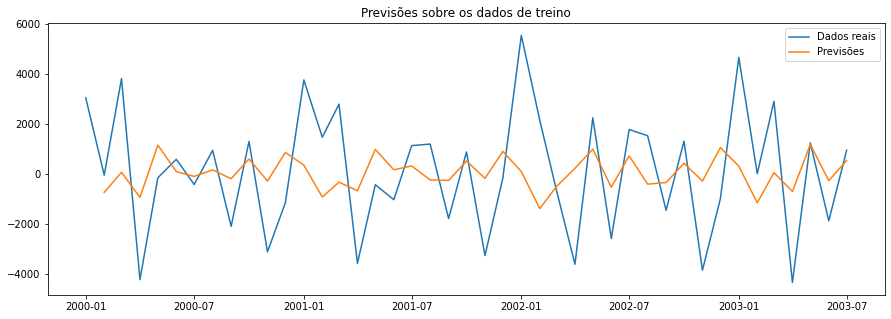

In [30]:
# Prevendo sobre dados existentes
df_train['Previsoes'] = ar_1_trained.predict()
df_train.head()

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(df_train.saldo_vendas)
plt.plot(df_train.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de treino')
plt.show()

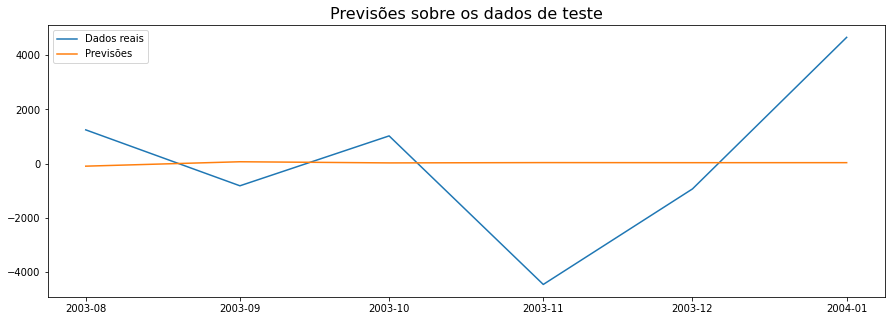

In [31]:
# Prevendo sobre os dados de teste e construindo o gráfico
df_test['Previsoes'] = ar_1_trained.predict(start=df_train.index.max(),
                                            end=df_test.index.max(),
                                           dynamic=True) # Treinando sobre os índices do teste

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(df_test.saldo_vendas)
plt.plot(df_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste',size=16)
plt.show()

As pevisões foram satisfatórias? Que conclusões podemos tirar desta forma das previsões?

### Escolhendo coeficientes pelo PACF

Como vimos anteriormente, podemos usar o `PACF` para termos uma ideia do número de atrasos que deveríamos considerar para nosso modelo autorregressivo. Vamos retomar este gráfico:

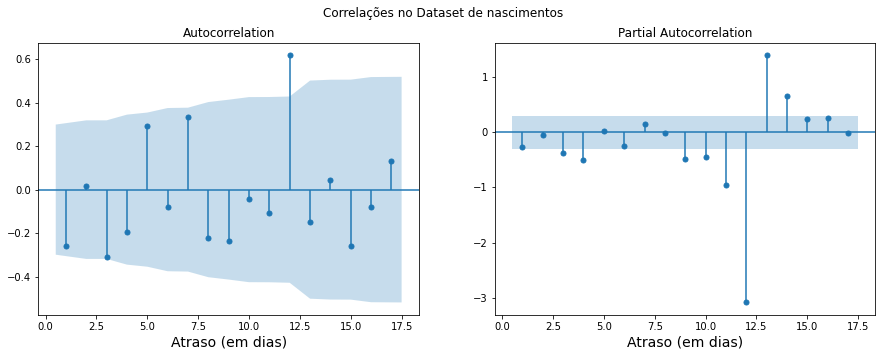

In [32]:
# Construindo novamente o ACF e o PACF
plota_correlacoes(df_train.saldo_vendas, unidade='dias',nome_dataset='nascimentos')

Com base nos valores da `PACF`, qual valor de atraso parece ser adequado para treinarmos nosso modelo `AR`?

Vamos treinar então agora um AR com **14** atrasos e ver o resultado!

In [33]:
# Treinando nova regressao, agora com 21 atrasos
# Data de corte
dt_corte = '2003-07-01'

# Separando em treino e teste, pela data e colocando a data como índice
df_train = df[df.Date<=dt_corte].set_index('Date')
df_test = df[df.Date>dt_corte].set_index('Date')

# Instanciando o modelo
ar_21 = AutoReg(endog=df_train,lags=14) # lags indica o atraso, endog a série de dados
# Treinando o modelo
ar_21_trained = ar_21.fit() # Estamos colocando o resultado do ajuste em um novo objeto
df_train['Previsoes'] = ar_21_trained.predict() # Prevendo sobre os dados de treino
ar_21_trained.summary() # Observando conclusões sobre os coeficientes

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           saldo_vendas   No. Observations:                   43
Model:                    AutoReg(14)   Log Likelihood                -241.072
Method:               Conditional MLE   S.D. of innovations            986.243
Date:                Mon, 09 May 2022   AIC                             14.891
Time:                        12:47:20   BIC                             15.646
Sample:                    03-01-2001   HQIC                            15.128
                         - 07-01-2003                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          477.5097    256.309      1.863      0.062     -24.846     979.866
saldo_vendas.L1     -0.6798      0.180     -3.777      0.000      -1.033      -0.327
saldo_vendas.L2     -0.7728      0.217     -3.553      0.000      -1.199      -0.347
saldo_vendas.L3     -0.6444      0.235     -2.740      0.006      -1.105      -0.183
saldo_vendas.L4     -0.6096      0.249     -2.452      0.014      -1.097      -0.122
saldo_vendas.L5     -0.5648      0.254     -2.222      0.026      -1.063      -0.067
saldo_vendas.L6     -0.4842      0.254     -1.906      0.057      -0.982       0.014
saldo_vendas.L7     -0.4160      0.241     -1.725      0.085      -0.889       0.057
saldo_vendas.L8     -0.3692      0.238     -1.549      0.122      -0.836       0.098
saldo_vendas.L9     -0.4906      0.223     -2.201      0.028      -0.927      -0.054
saldo_vendas.L10    -0.3473      0.227     -1.533      0.125      -0.791       0.097
saldo_vendas.L11    -0.3906      0.210     -1.858      0.063      -0.803       0.021
saldo_vendas.L12     0.4038      0.214      1.891      0.059      -0.015       0.822
saldo_vendas.L13     0.0575      0.185      0.311      0.756      -0.305       0.420
saldo_vendas.L14     0.2611      0.177      1.472      0.141      -0.087       0.609
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8851           -0.5355j            1.0345           -0.0866
AR.2             0.8851           +0.5355j            1.0345            0.0866
AR.3             0.5021           -0.8669j            1.0018           -0.1665
AR.4             0.5021           +0.8669j            1.0018            0.1665
AR.5             1.4182           -0.0000j            1.4182           -0.0000
AR.6            -0.9795           -0.0000j            0.9795           -0.5000
AR.7            -0.8682           -0.5019j            1.0029           -0.4166
AR.8            -0.8682           +0.5019j            1.0029            0.4166
AR.9            -0.5519           -0.8970j            1.0532           -0.3378
AR.10           -0.5519           +0.8970j            1.0532            0.3378
AR.11           -0.0093           -1.0599j            1.0599           -0.2514
AR.12           -0.0093           +1.0599j            1.0599            0.2514
AR.13           -0.2871           -1.4020j            1.4311           -0.2822
AR.14           -0.2871           +1.4020j            1.4311            0.2822
------------------------------------------------------------------------------
"""

Para facilitar a interpretação, vamos filtrar apenas os coeficientes com `P|z|<=0.05` (ou 5% de significância)

In [34]:
# O resultado final é dado em três tabelas, mas queremos a segunda delas, de coeficientes
tabela_total, coeficientes, raizes = ar_21_trained.summary().tables
# Transformando os coeficientes em um df
coefs_df = pd.DataFrame(coeficientes.data[1:],columns=coeficientes.data[0])
coefs_df['significancia'] = coefs_df["P>|z|"].astype(float)
# Filtrando apenas coeficientes estatisticamente relevantes
coefs_df[coefs_df['significancia']<=0.05]

,,coef,std err,z,P>|z|,[0.025,0.975],significancia
1,saldo_vendas.L1,-0.6798,0.180,-3.777,0.000,-1.033,-0.327,0.000
2,saldo_vendas.L2,-0.7728,0.217,-3.553,0.000,-1.199,-0.347,0.000
3,saldo_vendas.L3,-0.6444,0.235,-2.740,0.006,-1.105,-0.183,0.006
4,saldo_vendas.L4,-0.6096,0.249,-2.452,0.014,-1.097,-0.122,0.014
5,saldo_vendas.L5,-0.5648,0.254,-2.222,0.026,-1.063,-0.067,0.026
9,saldo_vendas.L9,-0.4906,0.223,-2.201,0.028,-0.927,-0.054,0.028


Muito melhor!!! Apenas os lags `1`, até `9` foram estatisticamente relevantes!

Checando novamente as previsões:

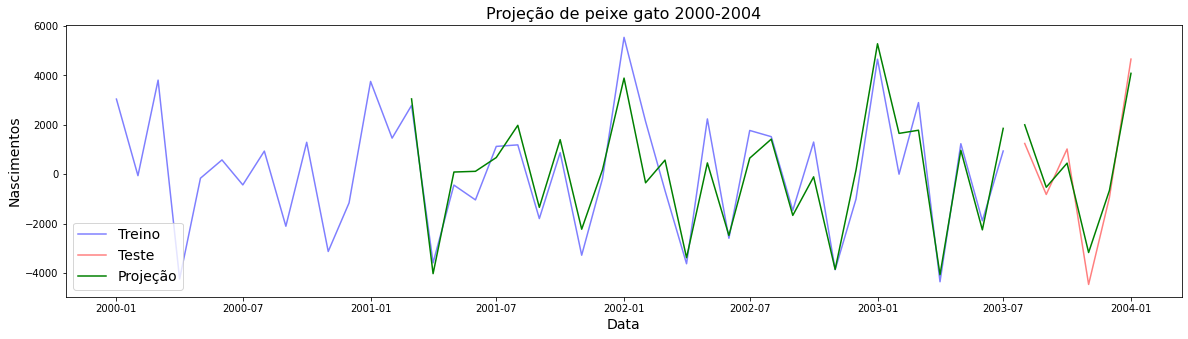

In [35]:
# Prevendo sobre dados existentes
df_train['Previsoes'] = ar_21_trained.predict()
df_test['Previsoes'] = ar_21_trained.predict(start=df_train.index.max(),end=df_test.index.max())

# Plotando resultados
plt.figure(figsize=(20,5))
plt.plot(df_train.saldo_vendas,color='b',alpha=0.5) # Dados reais de treino
plt.plot(df_test.saldo_vendas,color='r',alpha=0.5) # Dados reais de teste
plt.plot(df_train.Previsoes,color='g') # Projeção treino
plt.plot(df_test.Previsoes,color='g') # Projeção treino
plt.xlabel('Data',size=14)
plt.ylabel('Nascimentos',size=14)
plt.title('Projeção de peixe gato 2000-2004',size=16)
plt.legend(['Treino','Teste','Projeção'],prop={'size':14})
plt.show()

As previsões foram melhores que no modelo `AR(1)`?|

### E como avaliar performance?

Um dos principais problemas de séries temporais é o de que **o número de features pode ser muito grande**! Isso depende diretamente do número de atrasos que consideramos, e precisamos levar isso em consideração ao avaliar o modelo

In [36]:
# Revisitando nosso modelo treinado, apenas valores não nulos
df_train_perf = df_train[~df_train.Previsoes.isna()]
df_train_perf.head()

,saldo_vendas,Previsoes
Date,,
2001-03-01,2784.0,3047.404348
2001-04-01,-3585.0,-4022.601081
2001-05-01,-439.0,89.178888
2001-06-01,-1038.0,117.953502
2001-07-01,1126.0,675.849128


Podemos tentar usar métricas conhecidas de regressão, e vamos relembrar algumas delas:
* `RMSE`: Erro quadrático médio, pune mais outliers
* `MAE`: Erro absoluto médio, pune menos outliers
* `R2`: Coeficiente de correlação, ajuda a entender o quanto da variância dos dados o modelo explica _além_ da média

In [37]:
# Importando métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Avaliando métricas sobre os dados de treino
print('Métrica RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(df_train_perf.saldo_vendas, df_train_perf.Previsoes))))
print('Métrica MAE: {:.2f}'.format(mean_absolute_error(df_train_perf.saldo_vendas, df_train_perf.Previsoes)))
print('Métrica R2: {:.2f}'.format(r2_score(df_train_perf.saldo_vendas, df_train_perf.Previsoes)))

Métrica RMSE: 986.24
Métrica MAE: 784.74
Métrica R2: 0.84


Apesar dos valores acima, em séries temporais as três métricas acima podem ser `muito otimistas` pelo fato de podermos considerar cada vez mais variáveis de atraso no modelo! 

Como então **penalizar modelos com muitas variáveis**?

### Métricas de Séries Temporais: BIC e AIC

Temos duas métricas muito utilizadas em séries temporais: o `Bayesian Information Criteria` e o `Akaike Information Criteria`.
Elas possuem definições muito similares, mas basicamente acrescentam uma **penalidade** às métricas já conhecidas que se baseiam em soma dos erros:


<img src="https://miro.medium.com/max/546/1*sadddjTXEavxqY7glR23iQ.png" width=400>

No próprio modelo `AutoReg` podemos avaliar o AIC do ajuste:

In [38]:
# Extraindo a AIC do modelo treinado
ar_21_trained.aic

14.891254263384262

### Combinando os modelos AR e MA em um só: o modelo ARMA

O modelo `MA` permite que usemos os valores anteriores dos _erros_ da série como `features` da nossa regressão! Vamos agora treinar uma Média Móvel simples, usando apénas **o erro do primeiro atraso** como feature.

Diferentemente do modelo `AR`, não temos implementações isoladas do modelo `MA` no statsmodels, mas temos algo melhor do que isso: a combinação dos modelos `AR` e `MA` em um único modelo, o `ARMA`!

In [41]:
# O modelo MA também está no statsmodels, dentro do arma model
from statsmodels.tsa.arima_model import ARMA

# Instanciando o modelo
ma_1 = ARMA(endog=df_train.saldo_vendas,order=(0,1)) # A tupla 'order' indica os parâmetros do AR e do MA, respectivamente
# Treinando o modelo
ma_1_trained = ma_1.fit() # Estamos colocando o resultado do ajuste em um novo objeto
ma_1_trained.summary() # Observando conclusões sobre os coeficientes

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           saldo_vendas   No. Observations:                   43
Model:                     ARMA(0, 1)   Log Likelihood                -390.552
Method:                       css-mle   S.D. of innovations           2037.928
Date:                Mon, 09 May 2022   AIC                            787.103
Time:                        12:47:21   BIC                            792.387
Sample:                    01-01-2000   HQIC                           789.051
                         - 07-01-2003                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 57.2631     24.193      2.367      0.018       9.845     104.681
ma.L1.saldo_vendas    -0.9999      0.074    -13.426      0.000      -1.146      -0.854
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

O que podemos concluir sobre a **significância** do coeficiente do atraso de 1 dia?

Da mesma forma que no modelo `MA`, vamos também avaliar o modelo nos conjuntos de treino e teste:

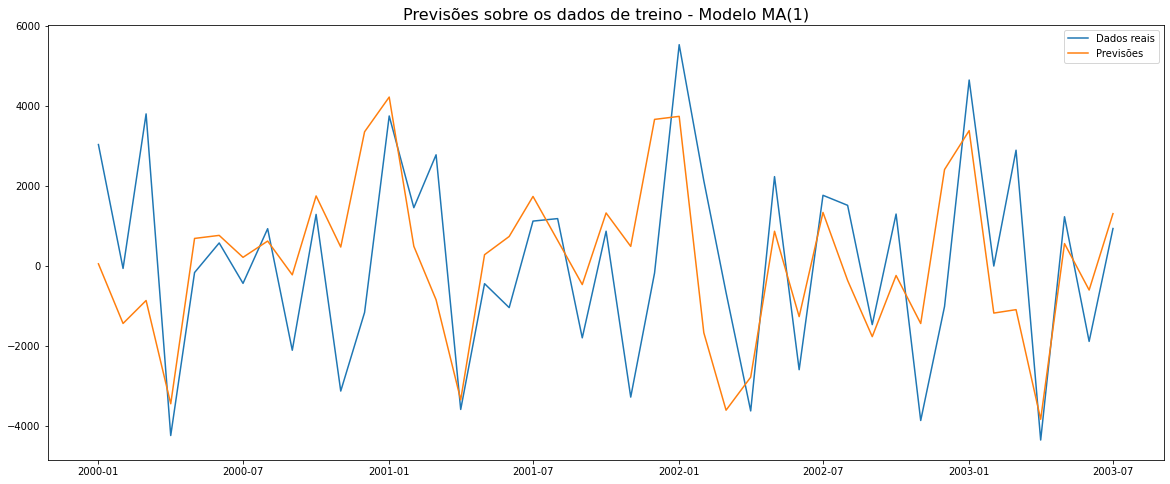

In [42]:
# Prevendo sobre dados existentes
df_train['Previsoes'] = ma_1_trained.predict()
df_train.head()

# Plotando dados previstos
plt.figure(figsize=(20,8))
plt.plot(df_train.saldo_vendas)
plt.plot(df_train.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de treino - Modelo MA(1)',size=16)
plt.show()

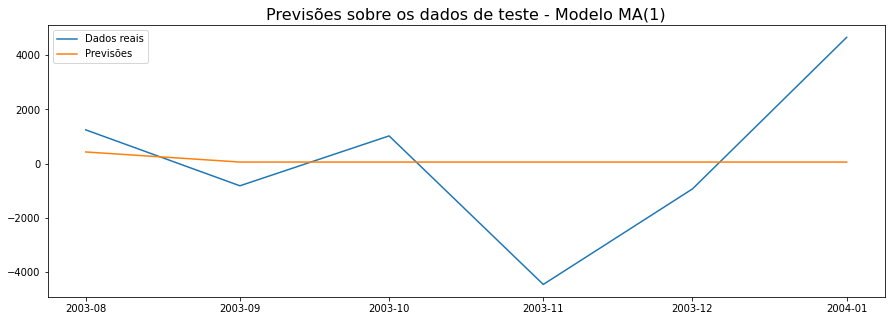

In [43]:
# Prevendo sobre os dados de teste e construindo o gráfico
df_test['Previsoes'] = ma_1_trained.predict(start=df_train.index[0],
                                            end=df_test.index[-1],
                                           ) # Treinando sobre os índices do teste

# Plotando dados previstos
plt.figure(figsize=(15,5))
plt.plot(df_test.saldo_vendas)
plt.plot(df_test.Previsoes)
plt.legend(['Dados reais','Previsões'])
plt.title('Previsões sobre os dados de teste - Modelo MA(1)',size=16)
plt.show()

### Escolhendo coeficientes pelo ACF

Como vimos anteriormente, podemos usar o `ACF` para termos uma ideia do número de atrasos que deveríamos considerar para nosso modelo de média móvel. Vamos retomar este gráfico:

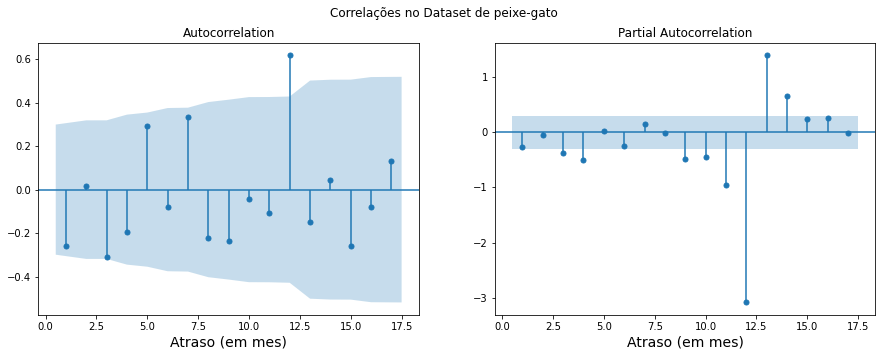

In [44]:
# Construindo novamente o ACF e o PACF
plota_correlacoes(df_train.saldo_vendas, unidade='mes',nome_dataset='peixe-gato')

Com base nos valores da `PACF`, qual valor de atraso parece ser adequado para treinarmos nosso modelo `MA`?

Vamos treinar então agora um `MA` com **11** atrasos e ver o resultado!

In [45]:
# Treinando nova regressao, agora com 21 atrasos
# Data de corte
dt_corte = '2003-07-01'

# Separando em treino e teste, pela data e colocando a data como índice
df_train = df[df.Date<=dt_corte].set_index('Date')
df_test = df[df.Date>dt_corte].set_index('Date')

# Instanciando o modelo
ma_11 = ARMA(endog=df_train,order=(0,11)) # lags indica o atraso, endog a série de dados
# Treinando o modelo
ma_11_trained = ar_21.fit() # Estamos colocando o resultado do ajuste em um novo objeto
df_train['Previsoes'] = ma_11_trained.predict() # Prevendo sobre os dados de treino
df_train['Previsoes'] = ma_11_trained.predict() # Prevendo sobre os dados de treino
ma_11_trained.summary() # Observando conclusões sobre os coeficientes

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:           saldo_vendas   No. Observations:                   43
Model:                    AutoReg(14)   Log Likelihood                -241.072
Method:               Conditional MLE   S.D. of innovations            986.243
Date:                Mon, 09 May 2022   AIC                             14.891
Time:                        12:47:21   BIC                             15.646
Sample:                    03-01-2001   HQIC                            15.128
                         - 07-01-2003                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept          477.5097    256.309      1.863      0.062     -24.846     979.866
saldo_vendas.L1     -0.6798      0.180     -3.777      0.000      -1.033      -0.327
saldo_vendas.L2     -0.7728      0.217     -3.553      0.000      -1.199      -0.347
saldo_vendas.L3     -0.6444      0.235     -2.740      0.006      -1.105      -0.183
saldo_vendas.L4     -0.6096      0.249     -2.452      0.014      -1.097      -0.122
saldo_vendas.L5     -0.5648      0.254     -2.222      0.026      -1.063      -0.067
saldo_vendas.L6     -0.4842      0.254     -1.906      0.057      -0.982       0.014
saldo_vendas.L7     -0.4160      0.241     -1.725      0.085      -0.889       0.057
saldo_vendas.L8     -0.3692      0.238     -1.549      0.122      -0.836       0.098
saldo_vendas.L9     -0.4906      0.223     -2.201      0.028      -0.927      -0.054
saldo_vendas.L10    -0.3473      0.227     -1.533      0.125      -0.791       0.097
saldo_vendas.L11    -0.3906      0.210     -1.858      0.063      -0.803       0.021
saldo_vendas.L12     0.4038      0.214      1.891      0.059      -0.015       0.822
saldo_vendas.L13     0.0575      0.185      0.311      0.756      -0.305       0.420
saldo_vendas.L14     0.2611      0.177      1.472      0.141      -0.087       0.609
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8851           -0.5355j            1.0345           -0.0866
AR.2             0.8851           +0.5355j            1.0345            0.0866
AR.3             0.5021           -0.8669j            1.0018           -0.1665
AR.4             0.5021           +0.8669j            1.0018            0.1665
AR.5             1.4182           -0.0000j            1.4182           -0.0000
AR.6            -0.9795           -0.0000j            0.9795           -0.5000
AR.7            -0.8682           -0.5019j            1.0029           -0.4166
AR.8            -0.8682           +0.5019j            1.0029            0.4166
AR.9            -0.5519           -0.8970j            1.0532           -0.3378
AR.10           -0.5519           +0.8970j            1.0532            0.3378
AR.11           -0.0093           -1.0599j            1.0599           -0.2514
AR.12           -0.0093           +1.0599j            1.0599            0.2514
AR.13           -0.2871           -1.4020j            1.4311           -0.2822
AR.14           -0.2871           +1.4020j            1.4311            0.2822
------------------------------------------------------------------------------
"""

Assim como no modelo `AR`, iremos plotar as performances do modelo `MA` nos dados preditos de treino e teste

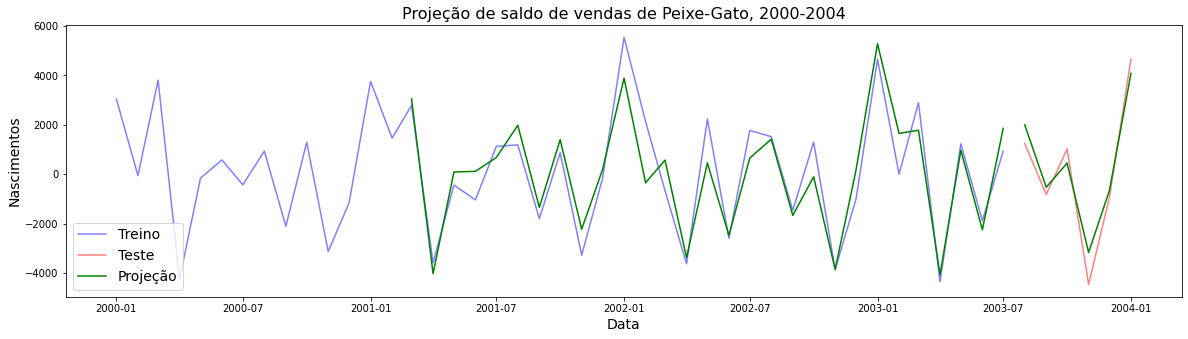

In [46]:
# Prevendo sobre dados existentes
df_train['Previsoes'] = ma_11_trained.predict()
df_test['Previsoes'] = ma_11_trained.predict(start=df_train.index.max(),end=df_test.index.max())

# Plotando resultados
plt.figure(figsize=(20,5))
plt.plot(df_train.saldo_vendas,color='b',alpha=0.5) # Dados reais de treino
plt.plot(df_test.saldo_vendas,color='r',alpha=0.5) # Dados reais de teste
plt.plot(df_train.Previsoes,color='g') # Projeção treino
plt.plot(df_test.Previsoes,color='g') # Projeção treino
plt.xlabel('Data',size=14)
plt.ylabel('Nascimentos',size=14)
plt.title('Projeção de saldo de vendas de Peixe-Gato, 2000-2004',size=16)
plt.legend(['Treino','Teste','Projeção'],prop={'size':14})
plt.show()

## 4. Modelando séries com tendências e sazonalidades

Já sabemos que tendências e sazonalidades não ocorrem em séries estacionárias, mas como modelar séries quando temos estes fatores?

### O princípio da diferenciação

Vamos retomar nosso exemplo dos Shampoos, uma série claramente `não estacionária`:

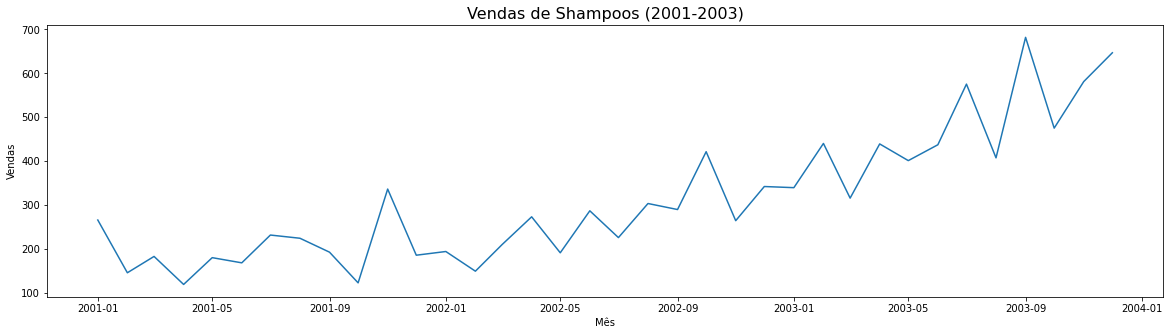

In [48]:
# Convertendo campo de data para Datetime
data_nao_estac['Mes'] = pd.to_datetime(data_nao_estac['Mes'])
data_nao_estac.set_index('Mes',inplace=True)

# Gráfico dos dados
plt.figure(figsize=(20,5))
plt.plot(data_nao_estac)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas de Shampoos (2001-2003)',size=16)
plt.show()

Apesar da flutuação dos dados parecer estável, o que temos é uma clara **tendência de crescimento** das vendas ao longo dos anos, o que faz com que localmente a média não seja constante!

In [49]:
# Testando estacionariedade
testes = adfuller(data_nao_estac)
print('p-valor (<.05 indica estacionariedade) desta série é {}'.format(testes[1]))

p-valor (<.05 indica estacionariedade) desta série é 1.0


Como esta série não é estacionária, para que possamos usar os algoritmos `AR` e `MA` precisaremos fazer algum tipo de **transformação** nos dados!

E se fizéssemos uma série da **variação** entre os valores de cada dia?

In [50]:
# O comando .diff() faz a diferença entre linhas consecutivas do dataset!
data_nao_estac['Diferenca'] = data_nao_estac.diff()

# Checando o dataset
data_nao_estac.head()

,Vendas,Diferenca
Mes,,
2001-01-01,266.0,NaN
2001-02-01,145.9,-120.1
2001-03-01,183.1,37.2
2001-04-01,119.3,-63.8
2001-05-01,180.3,61.0


Vamos agora plotar o gráfico e testar a estacionariedade dessa nova série!

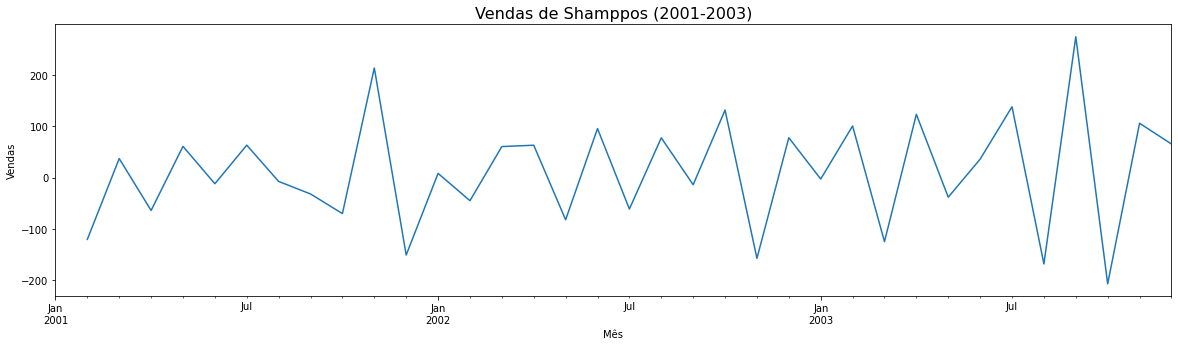

In [51]:
# Gráfico dos dados
plt.figure(figsize=(20,5))
data_nao_estac.Diferenca.plot(kind='line')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas de Shamppos (2001-2003)',size=16)
plt.show()

Parece mais estacionário?

In [52]:
# Testando estacionariedade
teste_diferenca = adfuller(data_nao_estac.Diferenca.dropna()) # O primeiro registro é NaN então excluímos!
print('p-valor (<.05 indica estacionariedade) desta série é {}'.format(teste_diferenca[1]))


p-valor (<.05 indica estacionariedade) desta série é 1.799857414168716e-10


Agora voltamos a ter uma série estacionária! Por fim, vamos avaliar as correlações dessa nova série:

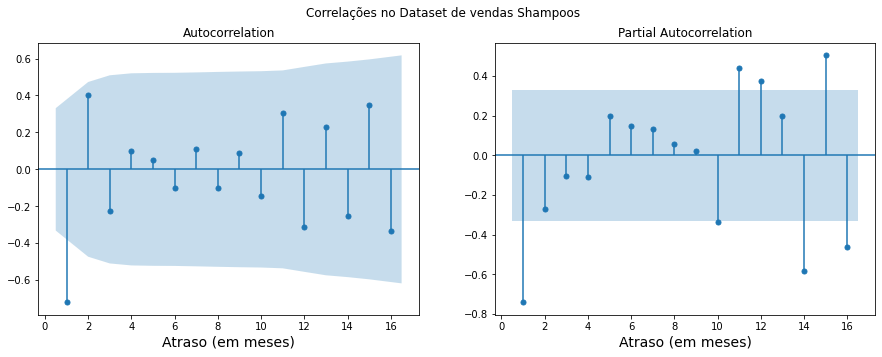

In [53]:
# Construindo novamente o ACF e o PACF
plota_correlacoes(data_nao_estac.Diferenca.dropna(), unidade='meses',nome_dataset='vendas Shampoos')

### ARIMA: A combinação dos métodos `AR`, `MA` e diferenciação

O modelo `ARIMA` incorpora além dos componentes `AR` e `MA` já conhecidos um novo elemento, **I**ntegrated, que indica o processo de diferenciação da série temporal antes da aplicação dos algoritmos que já conhecemos!

<center> <img src="https://i0.wp.com/neptune.ai/wp-content/uploads/ARIMA.png?resize=826%2C330&ssl=1" width=1000>

In [54]:
# Instanciando o ARIMA do módulo statsmodels
from statsmodels.tsa.arima_model import ARIMA

Para avaliar a performance do `ARIMA`, vamos compará-lo com um modelo `ARMA` ajustado aos mesmos dados

In [55]:
from pmdarima import ARIMA

# Separando os dados em treino e teste
naoestac_train = data_nao_estac[data_nao_estac.index<='2003-06-01'].drop('Diferenca',axis=1)
naoestac_test = data_nao_estac[data_nao_estac.index>'2003-06-01'].drop('Diferenca',axis=1)

# Ajustando um ARMA e um ARIMA aos dados, ambos de grau 1
arma_shampoos = ARMA(endog=naoestac_train.Vendas,order=(1,1)).fit()
arima_shampoos = ARIMA(order=(1,1,1)).fit(naoestac_train.Vendas)

# Prevendo os dados em treino e teste
# ARMA
naoestac_train['prev_arma'] = arma_shampoos.predict()
naoestac_test['prev_arma'] = arma_shampoos.predict(start=naoestac_train.index.max(),end=naoestac_test.index.max())
# ARIMA
naoestac_train['prev_arima'] = arima_shampoos.predict_in_sample()
naoestac_test['prev_arima'] = arima_shampoos.predict(start=naoestac_train.index.max(),n_periods=len(naoestac_test))

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotando os resultados das previsões

Text(0.5, 1.0, 'Previsões no conjunto de Teste')

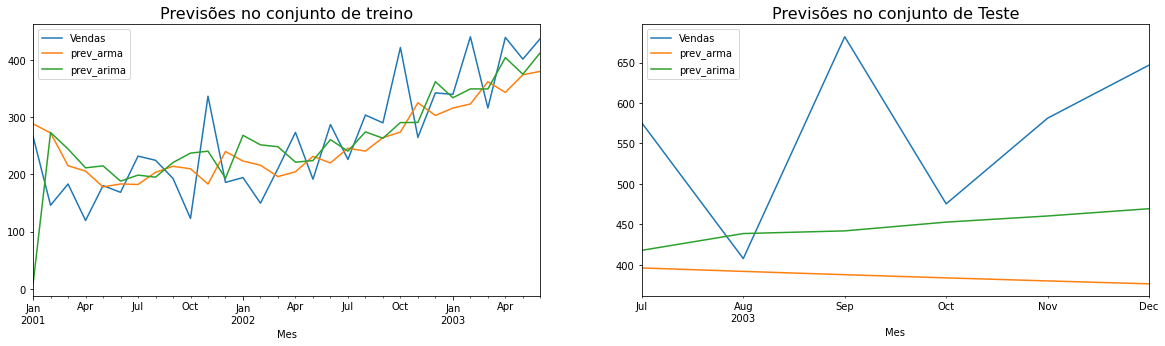

In [56]:
# Construindo gráficos para as previsões no treino e no teste
fig, ax = plt.subplots(1,2,figsize=(20,5))
naoestac_train.plot(ax=ax[0])
naoestac_test.plot(ax=ax[1])
ax[0].set_title('Previsões no conjunto de treino',size=16)
ax[1].set_title('Previsões no conjunto de Teste',size=16)

Qual dos modelos parece ter tido a melhor performance?

In [57]:
print("AIC do modelo ARMA: {:.2f}".format(arma_shampoos.aic))
print("AIC do modelo ARIMA: {:.2f}".format(arima_shampoos.aic()))

AIC do modelo ARMA: 347.19
AIC do modelo ARIMA: 327.14


### Otimizando os hiperparâmetros `p`, `d` e `q` do ARIMA

Como o número de possibilidades de hiperparâmetros é exponencial, precisamos ter uma forma otimizada de teste dos modelos para a escolha do melhor, semelhante ao que fazemos em uma **otimização de hiperparâmetros**.

Para esta tarefa, podemos usar a função `auto_arima`, também disponível no pacote `pmarima`:

In [58]:
# Importando o módulo
from pmdarima import auto_arima

# Instanciando e aplicando aos dados
auto_shampoo = auto_arima(naoestac_train.Vendas, #Dados
                         max_p=5, # Grau máximo de teste do módulo AR,
                         max_d=3, # Grau máximo de teste de diferenciação (I)
                         max_q=5, # Grau máximo de teste do módulo MA
                         trace=True # Para imprimir os resultados dos testes
                         )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.621 seconds


O próprio resultado da função já é um ARIMA treinado, então podemos usar as funções `.predict_sample()` e `predict()`

<Figure size 432x288 with 0 Axes>

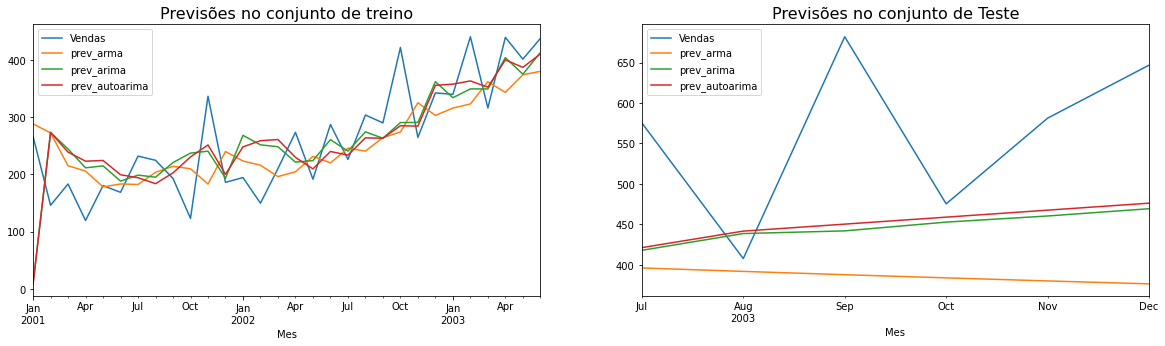

In [59]:
# Prevendo os resultados
naoestac_train['prev_autoarima'] = auto_shampoo.predict_in_sample()
naoestac_test['prev_autoarima'] = auto_shampoo.predict(start=naoestac_train.index.max(),n_periods=len(naoestac_test))

plt.figure()
# Plotando os resultados
fig, ax = plt.subplots(1,2,figsize=(20,5))
naoestac_train.plot(ax=ax[0])
naoestac_test.plot(ax=ax[1])
ax[0].set_title('Previsões no conjunto de treino',size=16)
ax[1].set_title('Previsões no conjunto de Teste',size=16)
plt.show()

## 5. Relembrando o que fizemos, e mais sugestões


<center> 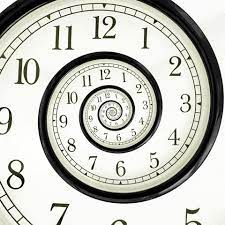

   
Vamos recapitular o que fizemos!:
    
* Carregamos e entendemos os dados disponíveis, usando transformações para `Datetime` e plotando gráficos `temporais`
* Fizemos a análise das correlações pelos gráficos de `PACF` e `ACF`, essenciais em séries temporais
* Treinamos nossos primeiros modelos `Autorregressivos (AR)` e de `Média Móvel (MA)` e os avaliamos usando a métrica `AIC`
* Treinamos um modelo `ARIMA` para considerar a tendência dos dados e usamos o `auto_arima` para encontrar os melhores parâmetros que otimizaram nossa métrica

## 6. Referências para ir além

<center> <img src="https://i0.wp.com/www.deviante.com.br/wp-content/uploads/2021/06/viagem-no-tempo-vingadores.gif?resize=480%2C270" width=1000>

O assunto de análise de séries temporais é `vasto`, e vimos apenas uma pequena parte da teoria envolvida! Para aprofundar os estudos, recomendo alguns livros e vídeos para depois:

* O canal [ritvikmath](https://www.youtube.com/c/ritvikmath) tem um conteúdo excelente que explora os tópicos que citamos e mais!
* O livro [Analysis of Financial Time Series](https://www.amazon.com.br/dp/B005CCUCWW/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1) também é um ótimo livro de cabeceira sobre o assunto, porém tem bastante matemática envolvida (e é caro pra caramba)!

# <center> Muito obrigado a todos!!!
    
<center> <img src="https://s.studiobinder.com/wp-content/uploads/2020/07/Michael-Scott-Wayne-Gretzsky-Quotes.jpg?resolution=1680,0.75" width=1500>